In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



In [21]:
dt1=pd.read_excel("C://Users/ayanb/Desktop/FlipRobo Technologies/Micro-Credit-Project/Micro Credit Project/Data file_1.xlsx")
dt1

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228333  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

            pdate  
0      2016-07-20  
1      2016-08-10  
2      2016-08-19  
3      2016-06-06  
4      2016-06-22  
...           ...  
209588 2016-06-17  
209589 2016-06-12  
209590 2016-07-29  
209591 2016-07-25  
209592 2016-07-07  

[209593 rows x 36 columns]

In [22]:
dt1.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

After analysis found that the following columns needs to be dropped as they have no requirement or are unwanted and unclear data:
Mobile Number of User.
Average main account balance over last 30 days(Unsure of given definition as mentioned in data sheet)
Average main account balance over last 90 days(Unsure of given definition as mentioned in data sheet)
Frequency of main account recharged in last 30 days(Unsure of given definition as mentioned in data sheet)
Frequency of main account recharged in last 90 days(Unsure of given definition as mentioned in data sheet)
telecom circle
date



In [23]:
#removing duplicate mobile numbers if any and keeping the first one.
dt2=dt1.drop_duplicates(subset=['msisdn'],keep="first")
dt2


label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209585      1  12227I90843   793.0   5350.315333   5356.210000    594.80   
209587      1  19900I95200   239.0  14678.000000  14704.900000  12935.26   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209591      1  59712I82733  1732.0  12488.228333  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209585    640.20                2.0                0.0              2309  ...   
209587  16775.60                8.0                0.0              3178  ...   
209588   1089.19                1.0                0.0              4048  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209585              6.0                 0.0          5.0            30   
209587             12.0                 1.0          3.0            24   
209588              6.0                 0.0          2.0            12   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209585                6                 0.0   5.200000   5.200000      UPW   
209587               12                 1.0   0.000000  30.000000      UPW   
209588                6                 0.0   1.000000   1.000000      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

            pdate  
0      2016-07-20  
1      2016-08-10  
2      2016-08-19  
3      2016-06-06  
4      2016-06-22  
...           ...  
209585 2016-07-04  
209587 2016-08-02  
209588 2016-06-17  
209591 2016-07-25  
209592 2016-07-07  

[186243 rows x 36 columns]

After removing duplicates we have 186243 rows .Now we are going to remove the columns as discussed above.

In [24]:

dt2.drop(['msisdn','rental30','rental90','fr_ma_rech30','fr_ma_rech90','pcircle','pdate'],axis=1,inplace=True)
dt2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


label     aon  daily_decr30  daily_decr90  last_rech_date_ma  \
0           0   272.0   3055.050000   3065.150000                2.0   
1           1   712.0  12122.000000  12124.750000               20.0   
2           1   535.0   1398.000000   1398.000000                3.0   
3           1   241.0     21.228000     21.228000               41.0   
4           1   947.0    150.619333    150.619333                4.0   
...       ...     ...           ...           ...                ...   
209585      1   793.0   5350.315333   5356.210000                2.0   
209587      1   239.0  14678.000000  14704.900000                8.0   
209588      1   404.0    151.872333    151.872333                1.0   
209591      1  1732.0  12488.228333  12574.370000                2.0   
209592      1  1581.0   4489.362000   4534.820000               13.0   

        last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  sumamnt_ma_rech30  \
0                     0.0              1539              2               3078   
1                     0.0              5787              1               5787   
2                     0.0              1539              1               1539   
3                     0.0               947              0                  0   
4                     0.0              2309              7              20029   
...                   ...               ...            ...                ...   
209585                0.0              2309              4               7696   
209587                0.0              3178              3              12143   
209588                0.0              4048              3              10404   
209591               38.0               773              5              12154   
209592                0.0              7526              2               9065   

        medianamnt_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0                     1539.0  ...            2            12              6.0   
1                     5787.0  ...            1            12             12.0   
2                     1539.0  ...            1             6              6.0   
3                        0.0  ...            2            12              6.0   
4                     2309.0  ...            7            42              6.0   
...                      ...  ...          ...           ...              ...   
209585                1924.0  ...            5            30              6.0   
209587                3178.0  ...            1            12             12.0   
209588                3178.0  ...            2            12              6.0   
209591                 773.0  ...            2            18             12.0   
209592                4532.5  ...            2            18             12.0   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0          2.0            12                6   
1                      0.0          1.0            12               12   
2                      0.0          1.0             6                6   
3                      0.0          2.0            12                6   
4                      0.0          7.0            42                6   
...                    ...          ...           ...              ...   
209585                 0.0          5.0            30                6   
209587                 1.0          3.0            24               12   
209588                 0.0          2.0            12                6   
209591                 0.0          3.0            24               12   
209592                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  
0                      0.0  29.000000  29.000000  
1                      0.0   0.000000   0.000000  
2                      0.0   0.000000   0.000000  
3                      0.0   0.000000   0.000000  
4                      0.0   2.333333   2.333333  
..

Now we can see the columns have reduced to 29.
So we have new shape of the data frame 186243 rows × 29 columns


In [25]:
dt2['label']
sns.countplot(dt2['label'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

From above we can see 1 which means 'User paid back the credit amount in 5 days' is higher as per the data.

In [7]:
dt2.describe()

label            aon   daily_decr30   daily_decr90  \
count  186243.000000  186243.000000  186243.000000  186243.000000   
mean        0.861149    8145.172831    5049.834558    5696.623026   
std         0.345792   75865.800335    8758.493684   10340.696921   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     241.000000      38.522000      38.791000   
50%         1.000000     522.000000    1332.110667    1360.000000   
75%         1.000000     979.000000    6710.066667    7229.220000   
max         1.000000  999860.755168  265926.000000  320630.000000   

       last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
count      186243.000000      186243.000000     186243.000000  186243.000000   
mean         3728.482692        3732.953680       2073.202891       3.646295   
std         53744.726961       53563.651356       2415.927330       3.915321   
min           -29.000000         -29.000000          0.000000       0.000000   
25%             1.000000           0.000000        770.000000       1.000000   
50%             3.000000           0.000000       1539.000000       3.000000   
75%             7.000000           0.000000       2309.000000       5.000000   
max        998650.377733      999171.809410      55000.000000     203.000000   

       sumamnt_ma_rech30  medianamnt_ma_rech30  ...    cnt_loans30  \
count      186243.000000         186243.000000  ...  186243.000000   
mean         7196.403199           1819.384882  ...       2.514645   
std          9675.574979           2116.884332  ...       2.266677   
min             0.000000              0.000000  ...       0.000000   
25%          1539.000000            770.000000  ...       1.000000   
50%          4617.000000           1539.000000  ...       2.000000   
75%          9335.000000           1924.000000  ...       3.000000   
max        810096.000000          55000.000000  ...      38.000000   

        amnt_loans30  maxamnt_loans30  medianamnt_loans30    cnt_loans90  \
count  186243.000000    186243.000000       186243.000000  186243.000000   
mean       16.363525       272.085598            0.056101      17.922651   
std        15.448270      4224.161293            0.222614     223.322525   
min         0.000000         0.000000            0.000000       0.000000   
25%         6.000000         6.000000            0.000000       1.000000   
50%        12.000000         6.000000            0.000000       2.000000   
75%        18.000000         6.000000            0.000000       4.000000   
max       306.000000     99864.560864            3.000000    4997.517944   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90      payback30  \
count  186243.000000    186243.000000        186243.00000  186243.000000   
mean       21.225431         6.675891             0.04826       3.351531   
std        23.189954         2.093362             0.20545       9.044574   
min         0.000000         0.000000             0.00000       0.000000   
25%         6.000000         6.000000             0.00000       0.000000   
50%        12.000000         6.000000             0.00000       0.000000   
75%        24.000000         6.000000             0.00000       3.666667   
max       438.000000        12.000000             3.00000     171.500000   

           payback90  
count  186243.000000  
mean        4.327624  
std        10.619785  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         4.500000  
max       171.500000  

[8 rows x 29 columns]

We can see outliers in every columns of the dataset as the max value is very higher than the mean value. 


In [8]:
dt2['daily_decr30'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

0.0       -93.012667
0.1         7.600000
0.2        25.120267
0.3        58.265600
0.4       216.401600
0.5      1332.110667
0.6      2900.710000
0.7      5178.019600
0.8      8613.990533
0.9     14642.897733
1.0    265926.000000
Name: daily_decr30, dtype: float64

<AxesSubplot:>

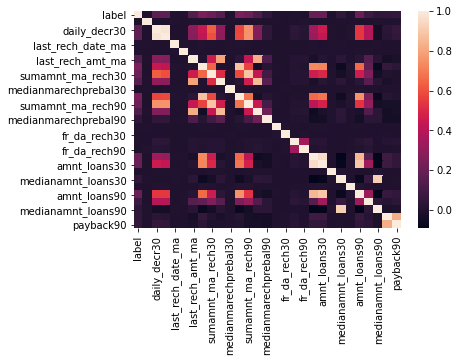

In [9]:
sns.heatmap(dt2.corr())

In [26]:
#finding outliers with zscore
from scipy.stats import zscore
z=np.abs(zscore(dt2))
z

array([[2.49037591, 0.10377791, 0.22775491, ..., 0.234897  , 2.83579276,
        2.32325254],
       [0.40154581, 0.09797818, 0.80746584, ..., 0.234897  , 0.37055804,
        0.40750695],
       [0.40154581, 0.10031125, 0.41694891, ..., 0.234897  , 0.37055804,
        0.40750695],
       ...,
       [0.40154581, 0.10203799, 0.55922577, ..., 0.234897  , 0.25999422,
        0.31334283],
       [0.40154581, 0.08453335, 0.84928003, ..., 0.234897  , 0.37055804,
        0.58121631],
       [0.40154581, 0.08652371, 0.06399206, ..., 0.234897  , 0.37055804,
        0.40750695]])

In [27]:
thres=3
print(np.where(z>3))

(array([    22,     30,     30, ..., 186234, 186239, 186239], dtype=int64), array([28,  4, 22, ...,  3, 22, 26], dtype=int64))


the above code is indicating the rows and columns in the dataset where zscore value is greater than 1, which indicates the outliers.We need to remove these outliers from our dataset.


In [28]:
#making outliers free data set.

dt3=dt2[(z<3).all(axis=1)]
dt3

label     aon  daily_decr30  daily_decr90  last_rech_date_ma  \
0           0   272.0   3055.050000   3065.150000                2.0   
1           1   712.0  12122.000000  12124.750000               20.0   
2           1   535.0   1398.000000   1398.000000                3.0   
3           1   241.0     21.228000     21.228000               41.0   
4           1   947.0    150.619333    150.619333                4.0   
...       ...     ...           ...           ...                ...   
209584      0   945.0      0.000000      0.000000                0.0   
209585      1   793.0   5350.315333   5356.210000                2.0   
209588      1   404.0    151.872333    151.872333                1.0   
209591      1  1732.0  12488.228333  12574.370000                2.0   
209592      1  1581.0   4489.362000   4534.820000               13.0   

        last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  sumamnt_ma_rech30  \
0                     0.0              1539              2               3078   
1                     0.0              5787              1               5787   
2                     0.0              1539              1               1539   
3                     0.0               947              0                  0   
4                     0.0              2309              7              20029   
...                   ...               ...            ...                ...   
209584                0.0                 0              0                  0   
209585                0.0              2309              4               7696   
209588                0.0              4048              3              10404   
209591               38.0               773              5              12154   
209592                0.0              7526              2               9065   

        medianamnt_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0                     1539.0  ...            2            12              6.0   
1                     5787.0  ...            1            12             12.0   
2                     1539.0  ...            1             6              6.0   
3                        0.0  ...            2            12              6.0   
4                     2309.0  ...            7            42              6.0   
...                      ...  ...          ...           ...              ...   
209584                   0.0  ...            1             6              6.0   
209585                1924.0  ...            5            30              6.0   
209588                3178.0  ...            2            12              6.0   
209591                 773.0  ...            2            18             12.0   
209592                4532.5  ...            2            18             12.0   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0          2.0            12                6   
1                      0.0          1.0            12               12   
2                      0.0          1.0             6                6   
3                      0.0          2.0            12                6   
4                      0.0          7.0            42                6   
...                    ...          ...           ...              ...   
209584                 0.0          1.0             6                6   
209585                 0.0          5.0            30                6   
209588                 0.0          2.0            12                6   
209591                 0.0          3.0            24               12   
209592                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  
0                      0.0  29.000000  29.000000  
1                      0.0   0.000000   0.000000  
2                      0.0   0.000000   0.000000  
3                      0.0   0.000000   0.000000  
4                      0.0   2.333333   2.333333  
..

In [29]:
dt3.describe()

label            aon   daily_decr30   daily_decr90  \
count  150146.000000  150146.000000  150146.000000  150146.000000   
mean        0.846323     644.628701    3592.319603    3966.373862   
std         0.360640     498.359053    5394.561244    6150.450845   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     233.000000      30.900333      31.106583   
50%         1.000000     508.000000     884.361667     900.000000   
75%         1.000000     950.000000    5290.597500    5611.075000   
max         1.000000    2440.000000   31315.776000   36717.030000   

       last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
count      150146.000000      150146.000000     150146.000000  150146.000000   
mean            6.233413           0.805769       1784.757256       3.146497   
std             9.913420           6.675639       1826.413512       2.853635   
min           -29.000000         -29.000000          0.000000       0.000000   
25%             1.000000           0.000000        770.000000       1.000000   
50%             3.000000           0.000000       1539.000000       2.000000   
75%             7.000000           0.000000       1924.000000       5.000000   
max           113.000000         115.000000       8000.000000      15.000000   

       sumamnt_ma_rech30  medianamnt_ma_rech30  ...    cnt_loans30  \
count      150146.000000         150146.000000  ...  150146.000000   
mean         5565.302872           1584.016174  ...       2.304457   
std          5774.087107           1633.346475  ...       1.697413   
min             0.000000              0.000000  ...       0.000000   
25%          1539.000000            770.000000  ...       1.000000   
50%          3856.000000           1539.000000  ...       2.000000   
75%          8000.000000           1547.000000  ...       3.000000   
max         36209.000000           8000.000000  ...       9.000000   

        amnt_loans30  maxamnt_loans30  medianamnt_loans30    cnt_loans90  \
count  150146.000000    150146.000000       150146.000000  150146.000000   
mean       14.639551        10.220324            0.016141       2.925619   
std        10.926018       190.591966            0.088374       2.515173   
min         0.000000         0.000000            0.000000       1.000000   
25%         6.000000         6.000000            0.000000       1.000000   
50%        12.000000         6.000000            0.000000       2.000000   
75%        18.000000         6.000000            0.000000       4.000000   
max        60.000000     12896.144335            0.500000      15.000000   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90      payback30  \
count  150146.000000    150146.000000       150146.000000  150146.000000   
mean       18.397653         6.591624            0.012877       2.584901   
std        15.915315         1.788784            0.079202       4.437289   
min         6.000000         6.000000            0.000000       0.000000   
25%         6.000000         6.000000            0.000000       0.000000   
50%        12.000000         6.000000            0.000000       0.000000   
75%        24.000000         6.000000            0.000000       3.714286   
max        90.000000        12.000000            0.500000      30.333333   

           payback90  
count  150146.000000  
mean        3.236871  
std         5.253040  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         4.500000  
max        36.142857  

[8 rows x 29 columns]

In [14]:
sns.heatmap(dt3.corr())


<AxesSubplot:>

# data Visualization

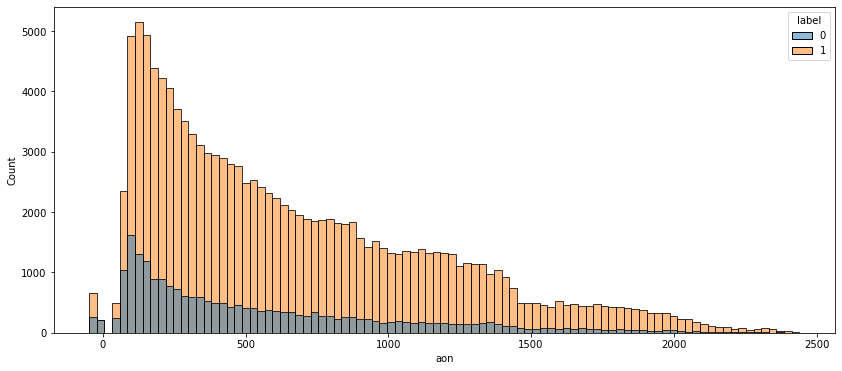

In [15]:
plt.figure(figsize=(14,6))
g=sns.histplot(data=dt3,x="aon",hue="label")

We can infer from above that people who paid back the credit amount within 5 days have more age on cellular network than people who are unable to pay.

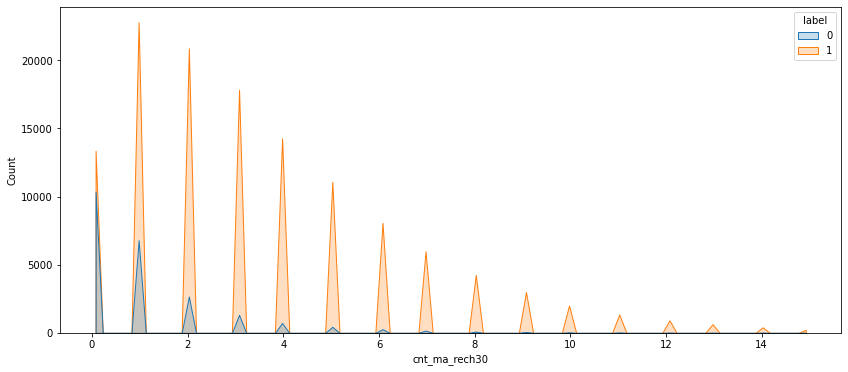

In [11]:
plt.figure(figsize=(14,6))
g=sns.histplot(data=dt3,x="cnt_ma_rech30",hue="label",element="poly")

In [17]:
plt.figure(figsize=(14,6))
g=sns.histplot(data=dt3,x="cnt_loans30",hue="label",element="poly")

In [15]:
plt.figure(figsize=(14,6))
g=sns.histplot(data=dt3,x="daily_decr30",hue="label",element="poly")

In [30]:
dt3.skew()

label                   -1.920627
aon                      0.959127
daily_decr30             1.978311
daily_decr90             2.083576
last_rech_date_ma        3.015451
last_rech_date_da       10.303715
last_rech_amt_ma         2.082493
cnt_ma_rech30            1.211229
sumamnt_ma_rech30        1.678092
medianamnt_ma_rech30     2.270893
medianmarechprebal30    10.810794
cnt_ma_rech90            1.353885
sumamnt_ma_rech90        1.738301
medianamnt_ma_rech90     2.303859
medianmarechprebal90     3.776123
cnt_da_rech30           50.181539
fr_da_rech30             0.000000
cnt_da_rech90            6.848634
fr_da_rech90             0.000000
cnt_loans30              1.501922
amnt_loans30             1.478878
maxamnt_loans30         54.278028
medianamnt_loans30       5.292544
cnt_loans90              1.725633
amnt_loans90             1.703620
maxamnt_loans90          2.692788
medianamnt_loans90       5.987877
payback30                2.662536
payback90                2.530132
dtype: float64

From the above rows we can see that there is huge skewness in the following rows cnt_da_rech30,maxamnt_loans30,medianmarechprebal30,last_rech_date_da

In [31]:
dt3.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt_da_rech30', ylabel='Density'>

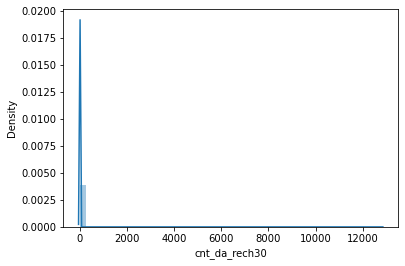

In [20]:
sns.distplot(dt3['cnt_da_rech30'])


In [21]:
sns.distplot(dt3['medianmarechprebal30'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medianmarechprebal30', ylabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='maxamnt_loans30', ylabel='Density'>

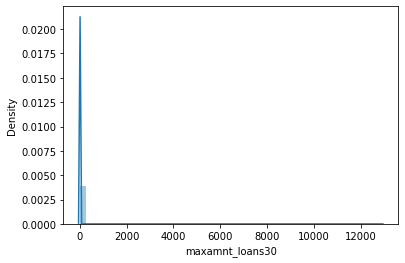

In [22]:
sns.distplot(dt3['maxamnt_loans30'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

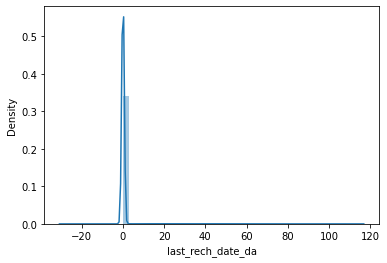

In [23]:
sns.distplot(dt3['last_rech_date_da'])

In [32]:
#dropping level from dt3 dataset

x=dt3.drop(['label'],axis=1)
y=dt3['label']

In [33]:
#checking skewness at columns 
x.skew()


aon                      0.959127
daily_decr30             1.978311
daily_decr90             2.083576
last_rech_date_ma        3.015451
last_rech_date_da       10.303715
last_rech_amt_ma         2.082493
cnt_ma_rech30            1.211229
sumamnt_ma_rech30        1.678092
medianamnt_ma_rech30     2.270893
medianmarechprebal30    10.810794
cnt_ma_rech90            1.353885
sumamnt_ma_rech90        1.738301
medianamnt_ma_rech90     2.303859
medianmarechprebal90     3.776123
cnt_da_rech30           50.181539
fr_da_rech30             0.000000
cnt_da_rech90            6.848634
fr_da_rech90             0.000000
cnt_loans30              1.501922
amnt_loans30             1.478878
maxamnt_loans30         54.278028
medianamnt_loans30       5.292544
cnt_loans90              1.725633
amnt_loans90             1.703620
maxamnt_loans90          2.692788
medianamnt_loans90       5.987877
payback30                2.662536
payback90                2.530132
dtype: float64

We can see a lot of skewed data in the table.Applying power transform to remove skewness.

In [34]:
from sklearn.preprocessing import power_transform
dt_new=power_transform(x)

dt_new=pd.DataFrame(dt_new,columns=x.columns)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [27]:
dt_new.skew()


aon                      0.308022
daily_decr30            -7.443323
daily_decr90            -7.877593
last_rech_date_ma        0.101398
last_rech_date_da      -57.270061
last_rech_amt_ma        -0.211426
cnt_ma_rech30           -0.020172
sumamnt_ma_rech30       -0.458820
medianamnt_ma_rech30    -0.339974
medianmarechprebal30     1.992575
cnt_ma_rech90           -0.024051
sumamnt_ma_rech90       -0.368430
medianamnt_ma_rech90    -0.206004
medianmarechprebal90     0.987279
cnt_da_rech30            9.612690
fr_da_rech30             0.000000
cnt_da_rech90            6.848634
fr_da_rech90             0.000000
cnt_loans30              0.070087
amnt_loans30            -0.006961
maxamnt_loans30         -0.925121
medianamnt_loans30       5.292544
cnt_loans90              0.219596
amnt_loans90             0.149499
maxamnt_loans90          2.692788
medianamnt_loans90       5.987877
payback30                0.409833
payback90                0.283707
dtype: float64

In [35]:
x=dt_new

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

Classification Models

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [31]:
dt_1=DecisionTreeClassifier()
dt_1.fit(x_train,y_train)
dt_1.score(x_train,y_train)
predt1=dt_1.predict(x_test)
tpr,fpr,thres=roc_curve(y_test,predt1)
print(accuracy_score(y_test,predt1))
print(classification_report(y_test,predt1))
print(confusion_matrix(y_test,predt1))

0.8403403320068599
              precision    recall  f1-score   support

           0       0.48      0.51      0.50      9283
           1       0.91      0.90      0.91     50776

    accuracy                           0.84     60059
   macro avg       0.70      0.71      0.70     60059
weighted avg       0.84      0.84      0.84     60059

[[ 4763  4520]
 [ 5069 45707]]


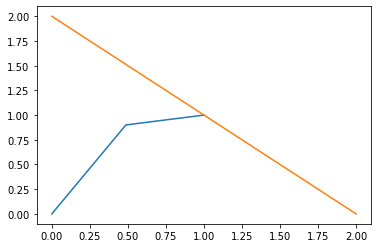

0.7066289062966078

In [58]:
tpr,fpr,thres=roc_curve(y_test,predt1)
plt.plot(tpr,fpr,thres)
plt.show()
roc_auc_score(y_test,predt1)


In [32]:
kdt_1=KNeighborsClassifier(n_neighbors=10)
kdt_1.fit(x_train,y_train)
kdt_1.score(x_train,y_train)
predkdt1=kdt_1.predict(x_test)
print(accuracy_score(y_test,predkdt1))
print(confusion_matrix(y_test,predkdt1))
print(classification_report(y_test,predkdt1))

0.8789690138030937
[[ 4300  4983]
 [ 2286 48490]]
              precision    recall  f1-score   support

           0       0.65      0.46      0.54      9283
           1       0.91      0.95      0.93     50776

    accuracy                           0.88     60059
   macro avg       0.78      0.71      0.74     60059
weighted avg       0.87      0.88      0.87     60059



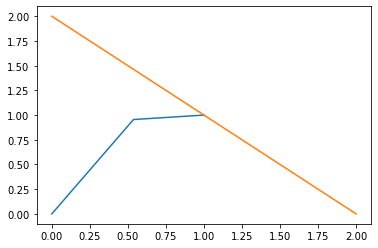

0.7090955268554983

In [59]:
tpr,fpr,thres=roc_curve(y_test,predkdt1)
plt.plot(tpr,fpr,thres)
plt.show()
roc_auc_score(y_test,predkdt1)

In [38]:

LoR=LogisticRegression(solver='lbfgs', max_iter=1000)
LoR.fit(x_train,y_train)
predLoR=LoR.predict(x_test)
print(accuracy_score(y_test,predLoR))
print(confusion_matrix(y_test,predLoR))
print(classification_report(y_test,predLoR))

0.8528613530028805
[[ 2235  7044]
 [ 1793 48987]]
              precision    recall  f1-score   support

           0       0.55      0.24      0.34      9279
           1       0.87      0.96      0.92     50780

    accuracy                           0.85     60059
   macro avg       0.71      0.60      0.63     60059
weighted avg       0.82      0.85      0.83     60059



In [60]:
tpr,fpr,thres=roc_curve(y_test,predLoR)
plt.plot(tpr,fpr,thres)
plt.show()
roc_auc_score(y_test,predLoR)

0.6002618632761161

In [39]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.888043423966433
[[ 4179  5100]
 [ 1624 49156]]
              precision    recall  f1-score   support

           0       0.72      0.45      0.55      9279
           1       0.91      0.97      0.94     50780

    accuracy                           0.89     60059
   macro avg       0.81      0.71      0.75     60059
weighted avg       0.88      0.89      0.88     60059



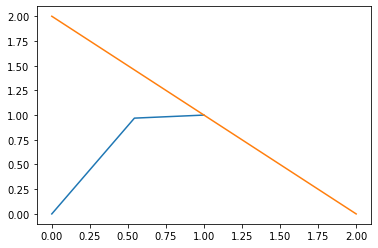

0.7130956680828038

In [61]:
tpr,fpr,thres=roc_curve(y_test,predrfc)
plt.plot(tpr,fpr,thres)
plt.show()
roc_auc_score(y_test,predrfc)

From the above ROC AUC score we can see that it is highest for the RandomForestClassifier.

Models formed and there respective accuracy.

Random Forest Classifier : 0.8884929819011306
Logistic Regression :   0.8543598794518723
KNeighborsClassifier  :    0.8792354185051366
DecisionTreeClassifier :   0.8366939176476464


So we can conclude that Random forest Classification model has provided the best accuracy above all models.

Now checking below cross validation score of all the models.

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
print(cross_val_score(dt_1,x,y,cv=5).mean())

0.839689358561782


In [36]:
print(cross_val_score(kdt_1,x,y,cv=5).mean())

0.8799967987433439


In [42]:
print(cross_val_score(LoR,x,y,cv=5).mean())

0.853962147391166


In [37]:
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8896807014846244


After finding out the difference between Accuracy score and cross validation score , we found that the Random forest Classification model is the best model.
Now improving the accuracy using Hyperparameter Tuning.

In [48]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini', 'entropy'],'max_depth':np.arange(1,5)}

GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [49]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4])})

In [50]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [51]:
nmod=RandomForestClassifier(criterion = 'entropy', max_depth= 4, random_state=100)
nmod.fit(x_train,y_train)
npred=nmod.predict(x_test)
print(accuracy_score(y_test,npred))

0.8825321766929186


After hyperparameter tuning ,the accuracy and final model accuracy is 88%

Saving the model

In [52]:
import joblib
joblib.dump(nmod,"MicroCreditProject.pkl")

['MicroCreditProject.pkl']